In [75]:
import pandas as pd
path=r"D:\Machine Learning project\Machine-Learning-Project\Algerian_forest_fires_dataset_UPDATE.csv"
df=pd.read_csv(path,header=1)

In [76]:
import sagemaker
import boto3
from sklearn.model_selection import train_test_split

# Create session
sess = boto3.Session()
region = sess.region_name

# Create clients from same session
sm_boto3 = sess.client("sagemaker")
s3 = sess.client("s3")

bucket = "sagemaker-s3-buc"

print("Using bucket:", bucket)
print("Region:", region)

# ✅ Check if bucket exists and you have access
try:
    s3.head_bucket(Bucket=bucket)
    print("Bucket exists and is accessible ✅")
except Exception as e:
    print("Bucket error ❌:", e)


Using bucket: sagemaker-s3-buc
Region: ap-south-1
Bucket exists and is accessible ✅


In [77]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [78]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [79]:
df.drop(index=122,inplace=True)

In [80]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [81]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [82]:
df.drop(index=123,inplace=True)

In [83]:
df.reset_index(drop=True,inplace=True)

In [84]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [85]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [87]:
df.columns=[column.strip() for column in df.columns]

In [88]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [89]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [90]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [91]:
df[df["Classes"].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [92]:
df.dropna(axis=0,inplace=True)


In [93]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [94]:
df.reset_index(drop=True,inplace=True)

In [95]:
[item.strip() for item in df["Classes"].unique()]

['not fire',
 'fire',
 'fire',
 'fire',
 'not fire',
 'not fire',
 'not fire',
 'not fire']

In [96]:
df["Classes"] = df["Classes"].astype(str).str.strip()


In [97]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [98]:
df["Classes"]=df["Classes"].replace("fire",1)

In [99]:
df["Classes"].value_counts()

Classes
1           137
not fire    106
Name: count, dtype: int64

In [100]:
df["Classes"]=df["Classes"].replace("not fire",0)

C:\Users\colle\AppData\Local\Temp\ipykernel_10132\375991578.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Classes"]=df["Classes"].replace("not fire",0)


In [101]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [102]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [103]:
df.sample(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
220,08,09,2012,30,88,14,0,82.5,6.6,26.1,3,8.1,2.7,1
208,27,08,2012,36,54,14,0,91,65.9,177.3,10,68,26.1,1


In [104]:
numerical_columns=[column for column in df.columns if df[column].dtype !="object"]

In [105]:
numerical_columns

['Classes']

In [106]:
object_columns=[column for column in df.columns if df[column].dtype =="object"]

In [107]:
object_columns

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [108]:
df.sample(3)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
114,23,09,2012,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
103,12,09,2012,29,88,13,0,71,2.6,16.6,1.2,3.7,0.5,0
225,13,09,2012,29,49,19,0,88.6,11.5,33.4,9.1,12.4,10.3,1


In [109]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [110]:
df.sample(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
197,16,8,2012,40,41,10,0.1,92,22.6,65.1,9.5,24.2,14.8,1
64,4,8,2012,34,69,13,0,85,8.2,19.8,4,8.2,3.9,1
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,0


In [111]:
df.drop(columns=["day","month","year"],axis=1,inplace=True)

In [112]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

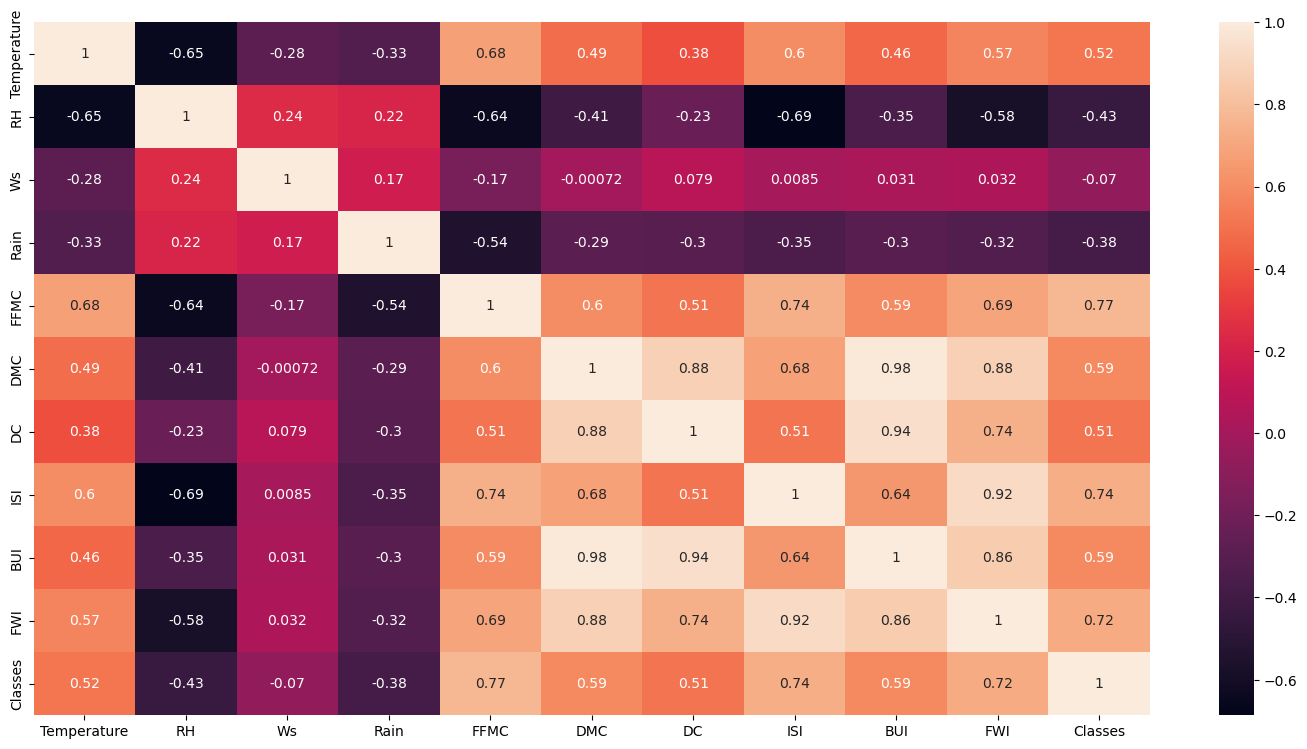

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))

sns.heatmap(df.corr(),annot=True,fmt=".2g")

In [114]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [115]:
#files 

X.to_csv("traning_data.csv",index=False)
y.to_csv("test_data.csv",index=False)

In [116]:
sess = boto3.Session()
s3 = sess.client("s3")
bucket = "sagemaker-s3-buc"


In [117]:
sk_prefix = "sagemaker/forest_fire_data"

# Make sure the filename matches exactly:
# if your file is actually "traning_data.csv", use that instead
s3.upload_file(
    Filename="traning_data.csv",  # or "training_data.csv" if that’s the real name
    Bucket=bucket,
    Key=f"{sk_prefix}/traning_data.csv"
)

s3.upload_file(
    Filename="test_data.csv",
    Bucket=bucket,
    Key=f"{sk_prefix}/test.csv"
)

training_path = f"s3://{bucket}/{sk_prefix}/traning_data.csv"
test_path = f"s3://{bucket}/{sk_prefix}/test.csv"

print("Training path:", training_path)
print("Test path:", test_path)


Training path: s3://sagemaker-s3-buc/sagemaker/forest_fire_data/traning_data.csv
Test path: s3://sagemaker-s3-buc/sagemaker/forest_fire_data/test.csv


In [118]:
container_image = image_uris.retrieve(
    framework="xgboost",
    region=region,
    version="1.5-1",      # you can change version if needed
    py_version="py3"
)

print("Using XGBoost image:", container_image)

NameError: name 'image_uris' is not defined

In [ ]:
X.shape
y.shape

(243,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(194, 10)
(49, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regression.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
import numpy as np

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

In [ ]:
print("Mean sqaured error:",mse)
print("mean absolute error:",mae)
print("Root mean squred error",rmse)
print("R2 score",score)

Mean sqaured error: 0.319988672026911
mean absolute error: 0.41232511086185897
Root mean squred error 0.5656754122523897
R2 score 0.9894422521436343


In [ ]:
regression.intercept_

np.float64(7.420103092783506)

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge()

ridge.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred=ridge.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score=r2_score(y_test,y_pred)
print("Accuracy Score:",score)

Accuracy Score: 0.9835883431264721


In [ ]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lasso=Lasso()

lasso.fit(X_train,y_train)
y_pred=regression.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("Mean sqaured error:",mse)
print("mean absolute error:",mae)
print("Root mean squred error",rmse)
print("R2 score:",score)

Mean sqaured error: 0.319988672026911
mean absolute error: 0.41232511086185897
Root mean squred error 0.5656754122523897
R2 score: 0.9894422521436343


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
elasticnet=ElasticNet()

elasticnet.fit(X_train,y_train)
y_pred=regression.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("Mean sqaured error:",mse)
print("mean absolute error:",mae)
print("Root mean squred error",rmse)
print("R2 score:",score)


Mean sqaured error: 0.319988672026911
mean absolute error: 0.41232511086185897
Root mean squred error 0.5656754122523897
R2 score: 0.9894422521436343


In [ ]:
### Support Vector Machines

In [ ]:
from sklearn.svm import SVR

vectorregression=SVR()

vectorregression.fit(X_train,y_train)

SVR()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred=vectorregression.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("Mean sqaured error:",mse)
print("mean absolute error:",mae)
print("Root mean squred error",rmse)
print("R2 score:",score)

Mean sqaured error: 2.1094059568807513
mean absolute error: 0.8750589399905409
Root mean squred error 1.4523794121650002
R2 score: 0.9304019855503206


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=5,algorithm="auto")
regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
scaler

StandardScaler()

In [ ]:
ridge

Ridge()

In [ ]:
import pickle

pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))

In [121]:
from sklearn.model_selection import train_test_split

X=df.drop("FWI",axis=1)
y=df["FWI"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [126]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



y_pred=regression.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score=r2_score(y_pred,y_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)

adjusted_r2=(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("score",score)
print("adjusted_r2_score",adjusted_r2)
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("root mean squared error",rmse)

score 0.9881716524905924
adjusted_r2_score 0.9858059829887108
mean_squared_error 0.49166442469887495
mean_absolute_error 0.46692580819633445
root mean squared error 0.7011878669079171


In [ ]:
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

regression=SVR()
regression.fit(X_train,y_train)

y_pred=regression.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score=r2_score(y_pred,y_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)

adjusted_r2=(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("score",score)
print("adjusted_r2_score",adjusted_r2)
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("root mean squared error",rmse)

score 0.7742130758562158
adjusted_r2_score 0.7290556910274589
mean_squared_error 6.046597745335415
mean_absolute_error 1.1483822652761788
root mean squared error 2.458983071380406


In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train KNN Regressor
regression = KNeighborsRegressor(n_neighbors=5, algorithm="auto")
regression.fit(X_train, y_train)

# Predict
y_pred = regression.predict(X_test)

# ✅ Correct metric order: (y_test, y_pred)
score = r2_score(y_test, y_pred)
mse   = mean_squared_error(y_test, y_pred)
mae   = mean_absolute_error(y_test, y_pred)
rmse  = np.sqrt(mse)

# ✅ Correct Adjusted R2 formula
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print results
print("R2 Score               :", score)
print("Adjusted R2 Score      :", adjusted_r2)
print("Mean Squared Error     :", mse)
print("Mean Absolute Error    :", mae)
print("Root Mean Squared Error:", rmse)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(max_depth=2,random_state=42)

regression.fit(X_train,y_train)

y_pred=regression.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score=r2_score(y_pred,y_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)

adjusted_r2=(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("score",score)
print("adjusted_r2_score",adjusted_r2)
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("root mean squared error",rmse)
print("root mean squared error",rmse)
print("root mean squared error",rmse)




TypeError: unsupported operand type(s) for /: 'str' and 'int'